## Neural Network Achitecture

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from warnings import filterwarnings
filterwarnings('ignore')

# Loading Dataset

1. The task in MNIST digit classification is to correctly classify handwritten digits into one of these 10 categories.
2. Each sample in the dataset is a `grayscale` image of `size 28×28` pixels.
3. Classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
print('Train Dataset Size:', len(x_train))
print('Test Dataset Size:', len(x_test))

Train Dataset Size: 60000
Test Dataset Size: 10000


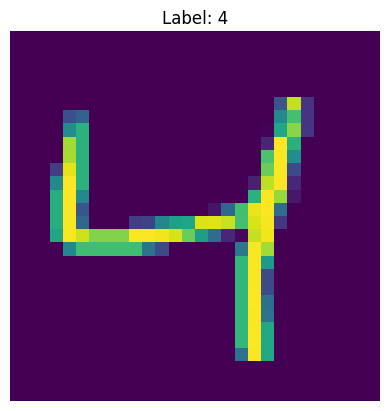

In [29]:
plt.imshow(x_train[2])
plt.title(f'Label: {y_train[2]}')
plt.axis('off')
plt.show()

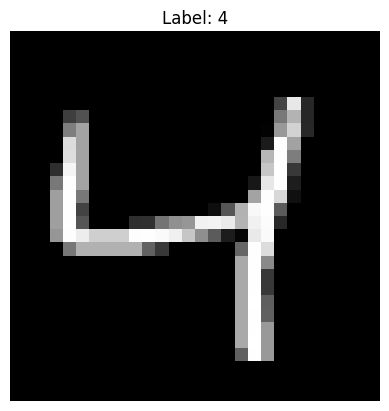

In [30]:
plt.imshow(x_train[2], cmap='gray')
plt.title(f'Label: {y_train[2]}')
plt.axis('off')
plt.show()

Showing 20 images at a time

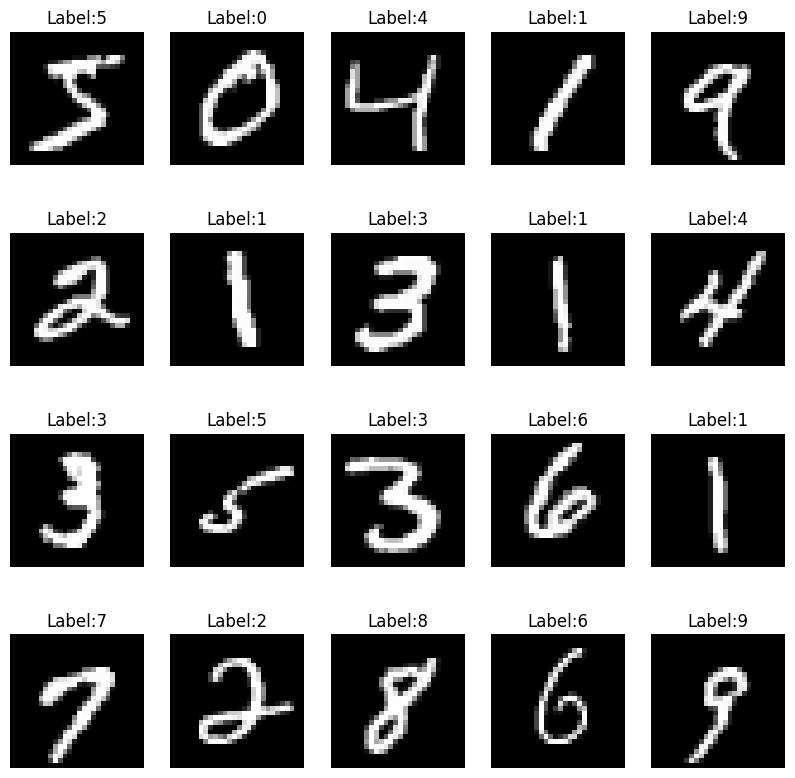

In [31]:
plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(4, 5, i+1)                # 4, 5 = 20 image
  plt.imshow(x_train[i], cmap='gray')   # back& white becasue of using cmap=gray
  plt.title(f'Label:{y_train[i]}')
  plt.axis('off')
plt.show()

### Normalization

1. Reshaping prepares the data for fully connected layers in a neural network.
2. Normalization ensures faster and more stable training by scaling input values.

In [32]:
x_train = x_train.reshape(-1, 28*28)/ 255.0  # Reshape make it 1D which is model requriment, for example before 1D it was matrix form or differnet noded, but model need 1D only
x_test = x_test.reshape(-1, 28*28)/ 255.0

# Define the Neural Network Architecture

In [33]:
model = Sequential([
    Dense(128, activation ='relu', input_shape=(28*28,)),  # Input Layer
    Dense(64, activation ='relu'),                          # Hidden
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')                         # Output Layer
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # sparce for multiclass when One hot encoding not used
              metrics=['accuracy'])

# Train the model
model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.25)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8467 - loss: 0.5046 - val_accuracy: 0.9583 - val_loss: 0.1412
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9633 - loss: 0.1218 - val_accuracy: 0.9661 - val_loss: 0.1159
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9758 - loss: 0.0807 - val_accuracy: 0.9655 - val_loss: 0.1108
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0585 - val_accuracy: 0.9714 - val_loss: 0.0945
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0437 - val_accuracy: 0.9675 - val_loss: 0.1251
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9720 - val_loss: 0.1066
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9709 - val_loss: 0.1078
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9910 - loss: 0.0270 - 

# Model Evaluation

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1412
Test Accuracy: 97.20%
Test Loss: 0.12


# Prediction

In [35]:
y_pred = model.predict(x_test)
# y_pred  # 10 Probabilic values or each class ; we have 10 class to shape will be (10000,10)  # y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
y_pred.shape

(10000, 10)

In [37]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6])

# Compute the confusion matrix

In [38]:
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")  # Diagonals are correct prediction
print(cm)

Confusion Matrix:
[[ 967    0    1    5    2    1    2    1    0    1]
 [   0 1124    2    3    0    1    1    2    1    1]
 [   6    0 1002    5    2    0    3   10    2    2]
 [   0    0    5  994    0    4    0    3    0    4]
 [   0    0    2    0  959    0    3    3    0   15]
 [   1    0    0   12    1  872    2    1    0    3]
 [   3    3    1    1    3    7  939    0    1    0]
 [   1    3    8    3    1    0    0 1005    1    6]
 [   2    0    7   33    6   21    4    7  880   14]
 [   3    3    0    8    8    2    1    6    0  978]]


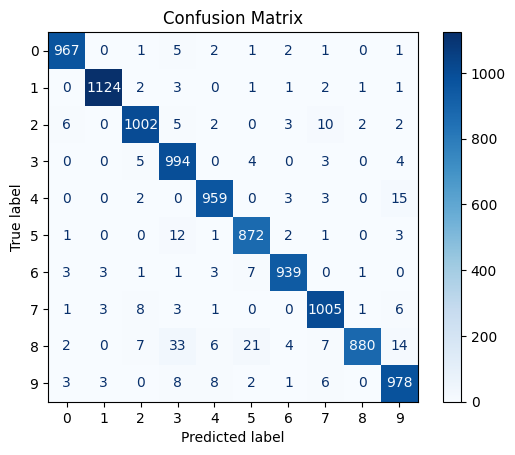

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Save the model - Google Colab

Method 1: Save and Download Directly

In [41]:
# Save the model
model.save('nn_model.h5')

# Download the model to your local machine
from google.colab import files
files.download('nn_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Method 2: Save to Google Drive

In [43]:
# Drive mount before save the model
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [45]:
# Save the Model to Google Drive:
# Specify the path in your Google Drive
model_path = '/content/drive/My Drive/nn_model.h5'

# Save the model
model.save(model_path)

'''
If warnings then it can be saved by native keras format:
# Save the model in native Keras format
model.save('nn_model.keras')
'''

"\nIf warnings then it can be saved by native keras format:\n# Save the model in native Keras format\nmodel.save('nn_model.keras')\n"

# Loaded the Saved Model

In [46]:
# Load the model from the .keras file
model = tf.keras.models.load_model('nn_model.h5')    # tf.keras.models.load_model('nn_model.keras')


In [49]:
# Assuming x_test is your test dataset and already preprocessed
predictions = model.predict(x_test)

# Get the predicted class for each image
predicted_classes = tf.argmax(predictions, axis=1)

# Print the predicted classes
print(predicted_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
tf.Tensor([7 2 1 ... 4 5 6], shape=(10000,), dtype=int64)


## Save & Load model - Local (Addtional Test Code)

In [52]:
'''
### Save the model
model.save('nn_model.h5')

### Load the model
loaded_model = tf.keras.models.load_model('nn_model.h5')
loaded_model
'''

"\n### Save the model\nmodel.save('nn_model.h5')\n\n### Load the model\nloaded_model = tf.keras.models.load_model('nn_model.h5')\nloaded_model\n"

### Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
True Label: 8
Predicted Label: 8


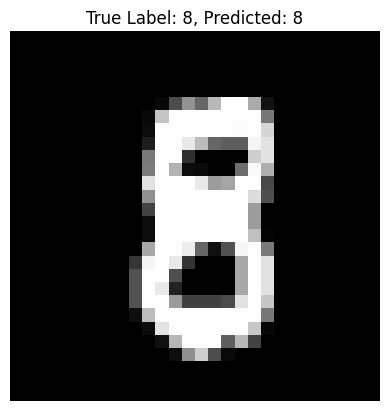

In [51]:
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]

random_image_reshaped = random_image.reshape(1, 28 * 28)
predictions = model.predict(random_image_reshaped)
predicted_label = np.argmax(predictions)

print(f"True Label: {random_label}")
print(f"Predicted Label: {predicted_label}")

plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {random_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()